## Exercise Sheet 6

#### **Submission** <br> 21.07. 12:00 (via studIP)
#### **Defense** <br> 24.07. 08:00-10:00, 24.07 16:00-18:00 or 25.07. 10:00-12:00

A **maximum** of 3 percentage points bonus for the exam can be achieved with each sheet if:
1) at least 60% of the worksheet has been completed correctly 
2) the worksheet has been successfully defended (explained to the tutors).
*Conditions*:
- Each group must register for a slot in studIP for the defense. Only ONE person registers a slot. The whole group must appear for defense.
- Successful defense means that a team member selected by us explains the solution and answers questions about it.
- ChatGPT and other tools may be used, but must be cited.
- The code must be explained without any aids.
- We will not only evaluate the correctness of the results, but also whether the code is efficient, easy to understand, tidy and well documented.
- Each group submits only one solution as a zip file, which is provided with the name and student number of a group member. For example, `mustermann_12345678.zip`.
- Please also enter the names and student numbers of all group members here:
  - [zunaira zunaira] [10931968] 
  - [Muhammad Mustafa] [25850354]
  - [Neha Neha] [29235578]

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from utils import color1, color2, custom_cmap

---

## Exercise 1 (45%): K-Nearest-Neighbours/Logistic-Regression

a) (5%) Load the “samples.npy” and “labels.npy”. Visualize the samples in a scatterplot with the imported colors "color1" and "color2" for the different labels.

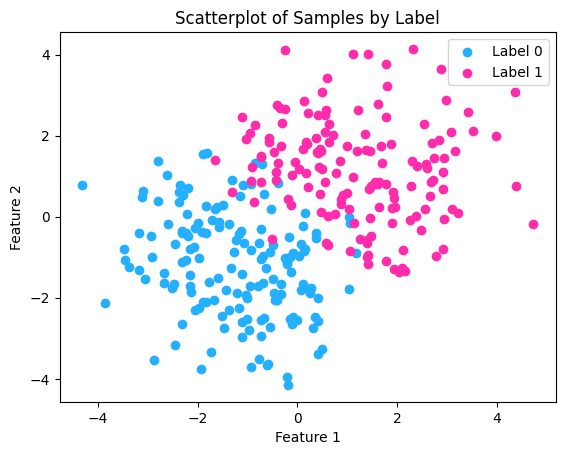

In [31]:

# Load the data
samples = np.load('samples.npy')
labels = np.load('labels.npy')

# Separate samples by label
samples_label1 = samples[labels == 0]
samples_label2 = samples[labels == 1]

# Plot
plt.scatter(samples_label1[:, 0], samples_label1[:, 1], color=color1, label='Label 0')
plt.scatter(samples_label2[:, 0], samples_label2[:, 1], color=color2, label='Label 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatterplot of Samples by Label')
plt.legend()
plt.show()


b) (5%) Fit a KNeighborsClassifier algorithm from sklearn with k=2 and calculate the classification accuracy

In [32]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNN classifier with k=2
knn = KNeighborsClassifier(n_neighbors=2)

# Fit the model
knn.fit(samples, labels)

# Predict the labels for the training samples
predicted_labels = knn.predict(samples)

# Calculate accuracy
accuracy = accuracy_score(labels, predicted_labels)
print(f'Classification accuracy: {accuracy:.4f}')


Classification accuracy: 0.9633


c) (15%) Plot the fitted classification limits from b) into your figure from a). 

*Hint: Create a grid using `np.meshgrid`, then let your fitted KNeighborsClassifier classify each point. Plot the result using plt.imshow. You can use the imported “custom_cmap” as cmap.*

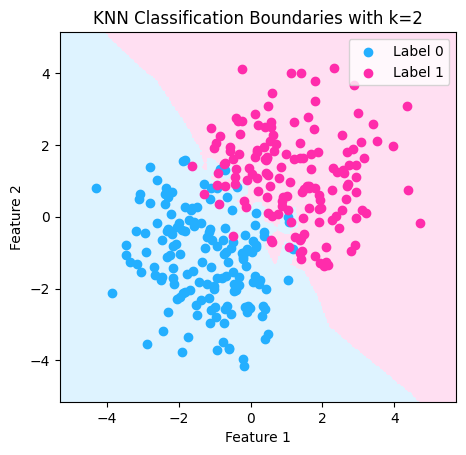

In [ ]:

# Fit KNN with k=2
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(samples, labels)

# Create scatterplot of samples
plt.scatter(samples[labels == 0][:, 0], samples[labels == 0][:, 1], color=color1, label='Label 0')
plt.scatter(samples[labels == 1][:, 0], samples[labels == 1][:, 1], color=color2, label='Label 1')

# Create grid to evaluate model
x_min, x_max = samples[:, 0].min() - 1, samples[:, 0].max() + 1
y_min, y_max = samples[:, 1].min() - 1, samples[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

# Predict class for each point in the grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = knn.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot classification boundaries
plt.imshow(Z, interpolation='nearest',
           extent=(x_min, x_max, y_min, y_max),
           origin='lower',
           alpha=0.3,
           cmap=custom_cmap)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Classification Boundaries with k=2')
plt.legend()
plt.show()


d) (5%) You will notice small islands in the classification boundaries. What is the smallest value of k at which the islands disappear? For which value of k is the accuracy best?

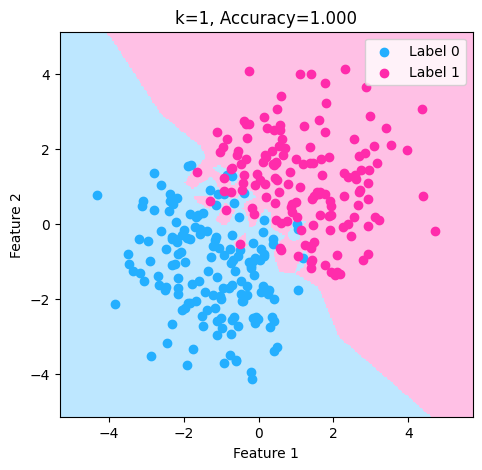

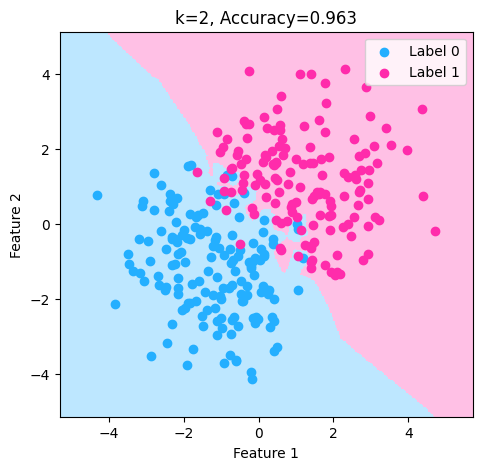

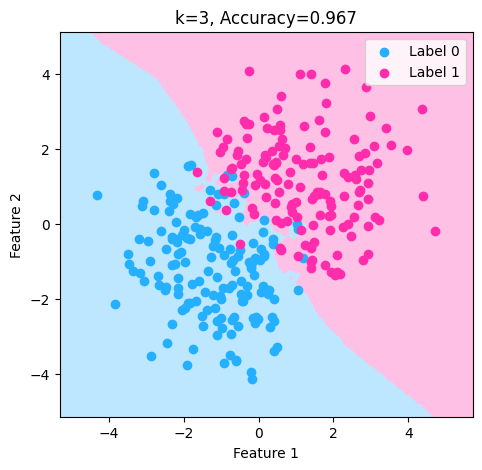

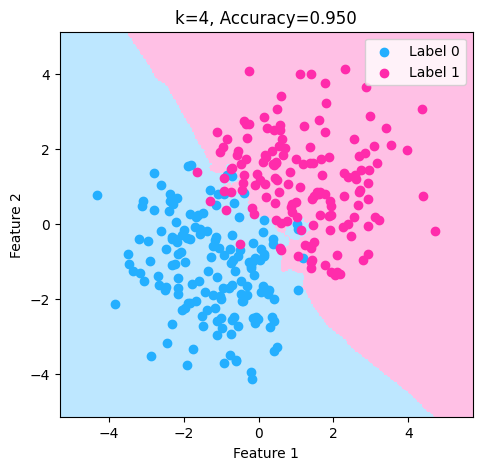

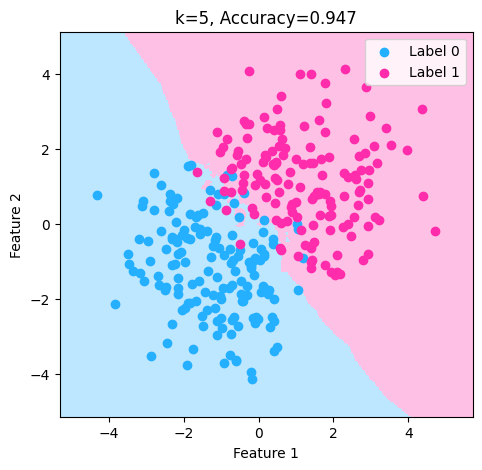

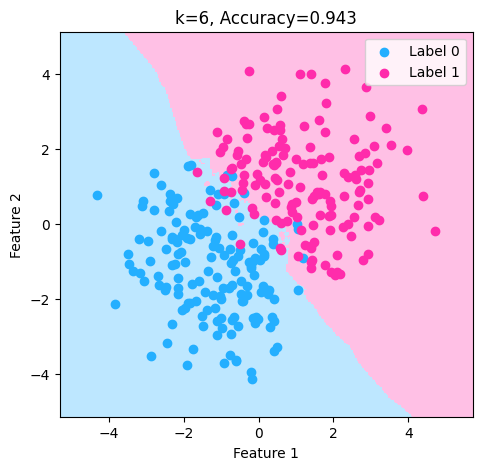

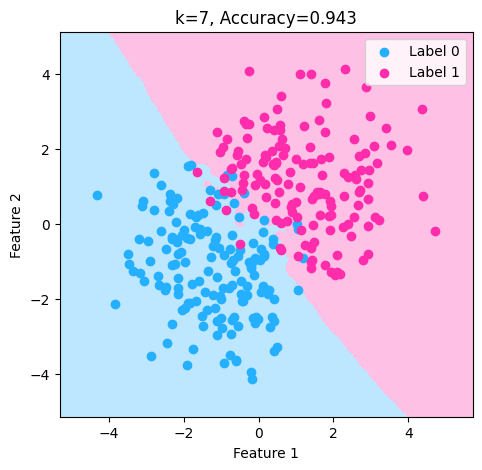

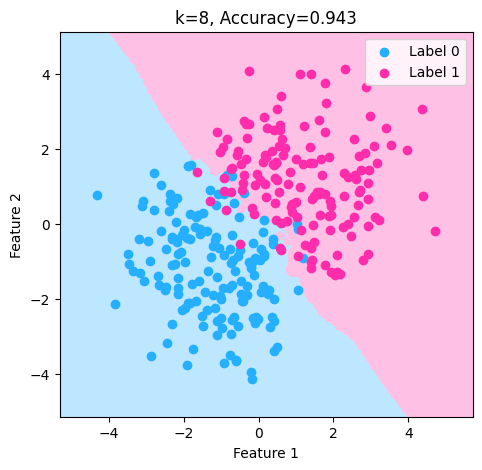

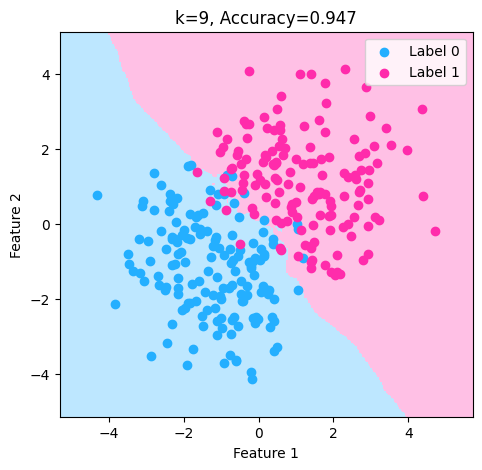

Best accuracy of 1.000 achieved at k=1
Check the plots above to identify the smallest k where islands disappear.


In [34]:

# Define or import your custom colormap here, e.g.:
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap([color1, color2])

x_min, x_max = samples[:, 0].min() - 1, samples[:, 0].max() + 1
y_min, y_max = samples[:, 1].min() - 1, samples[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
grid_points = np.c_[xx.ravel(), yy.ravel()]

best_accuracy = 0
best_k = None

for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(samples, labels)
    preds = knn.predict(samples)
    acc = accuracy_score(labels, preds)
    
    # Predict grid for plotting
    Z = knn.predict(grid_points).reshape(xx.shape)
    
    plt.figure(figsize=(6,5))
    plt.imshow(Z, interpolation='nearest',
               extent=(x_min, x_max, y_min, y_max),
               origin='lower', alpha=0.3, cmap=custom_cmap)
    plt.scatter(samples[labels == 0][:, 0], samples[labels == 0][:, 1], color=color1, label='Label 0')
    plt.scatter(samples[labels == 1][:, 0], samples[labels == 1][:, 1], color=color2, label='Label 1')
    plt.title(f'k={k}, Accuracy={acc:.3f}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k

print(f'Best accuracy of {best_accuracy:.3f} achieved at k={best_k}')
print('Check the plots above to identify the smallest k where islands disappear.')


e) (5%) Load the test data “samples_test.npy” and “labels_test.npy” and calculate the accuracy for these too. What do you notice?

In [35]:

# Load test data
samples_test = np.load('samples_test.npy')
labels_test = np.load('labels_test.npy')

# Choose the best k (for example from your previous results)
best_k = 5  # replace with your actual best_k

# Train KNN on training data
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(samples, labels)

# Predict on test data
predicted_test_labels = knn.predict(samples_test)

# Calculate test accuracy
test_accuracy = accuracy_score(labels_test, predicted_test_labels)
print(f'Test accuracy with k={best_k}: {test_accuracy:.4f}')


Test accuracy with k=5: 0.9400


f) (10%) Fit the data with a LogisticRegression from sklearn and create a plot like in c), one with the continuous classification "limits" and one with hard limits (threshold at 0.5). Compare the training and test accuracies. How are the results different from those of your KNeighborsClassifier?

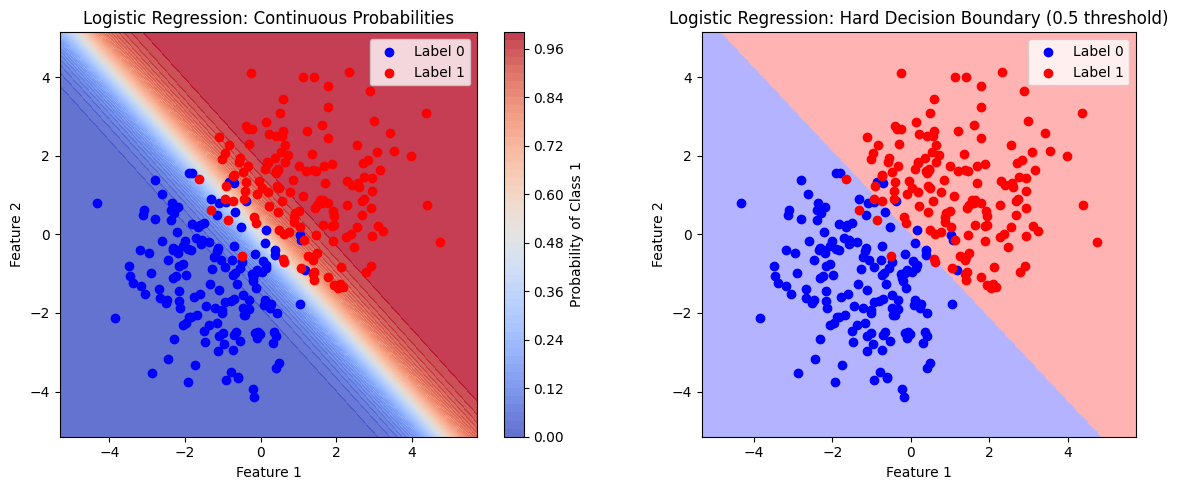

Training accuracy (Logistic Regression): 0.9500
Test accuracy (Logistic Regression): 0.9400


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Load data
samples = np.load('samples.npy')
labels = np.load('labels.npy')
samples_test = np.load('samples_test.npy')
labels_test = np.load('labels_test.npy')

# Colors and colormap
color1 = 'blue'
color2 = 'red'
custom_cmap = ListedColormap([color1, color2])

# Fit Logistic Regression
logreg = LogisticRegression()
logreg.fit(samples, labels)

# Create grid for plotting
x_min, x_max = samples[:, 0].min() - 1, samples[:, 0].max() + 1
y_min, y_max = samples[:, 1].min() - 1, samples[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict probabilities on grid (for continuous surface)
probs = logreg.predict_proba(grid_points)[:, 1].reshape(xx.shape)

# Predict hard labels on grid (threshold = 0.5)
hard_preds = (probs >= 0.5).astype(int)

# Plotting
plt.figure(figsize=(12, 5))

# 1) Continuous probability plot
plt.subplot(1, 2, 1)
contour = plt.contourf(xx, yy, probs, levels=50, cmap='coolwarm', alpha=0.8)
plt.colorbar(contour, label='Probability of Class 1')
plt.scatter(samples[labels == 0][:, 0], samples[labels == 0][:, 1], color=color1, label='Label 0')
plt.scatter(samples[labels == 1][:, 0], samples[labels == 1][:, 1], color=color2, label='Label 1')
plt.title('Logistic Regression: Continuous Probabilities')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# 2) Hard decision boundary plot
plt.subplot(1, 2, 2)
plt.imshow(hard_preds, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap=custom_cmap, alpha=0.3)
plt.scatter(samples[labels == 0][:, 0], samples[labels == 0][:, 1], color=color1, label='Label 0')
plt.scatter(samples[labels == 1][:, 0], samples[labels == 1][:, 1], color=color2, label='Label 1')
plt.title('Logistic Regression: Hard Decision Boundary (0.5 threshold)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate accuracies
train_preds = logreg.predict(samples)
test_preds = logreg.predict(samples_test)
train_acc = accuracy_score(labels, train_preds)
test_acc = accuracy_score(labels_test, test_preds)

print(f"Training accuracy (Logistic Regression): {train_acc:.4f}")
print(f"Test accuracy (Logistic Regression): {test_acc:.4f}")


---

## Exercise 2 (55%): Cross Validation

For this task only use the KNeighborsClassifier from sklearn. If you get stuck with a subtask, you can also use other functions from sklearn, such as `train_test_split` or `cross_val_score`. But then of course without receiving the points from the respective sub-task.

a) (10%) Load the data "ex2_samples.npy" and "ex2_labels.npy" and visualize them as in task 1. You will see that the data is not classifiable with a linear classifier. Write a function that transforms the data into a different coordinate system in which it is easier to classify.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
# 1. Load data
X = np.load('ex2_samples.npy')
y = np.load('ex2_labels.npy') 

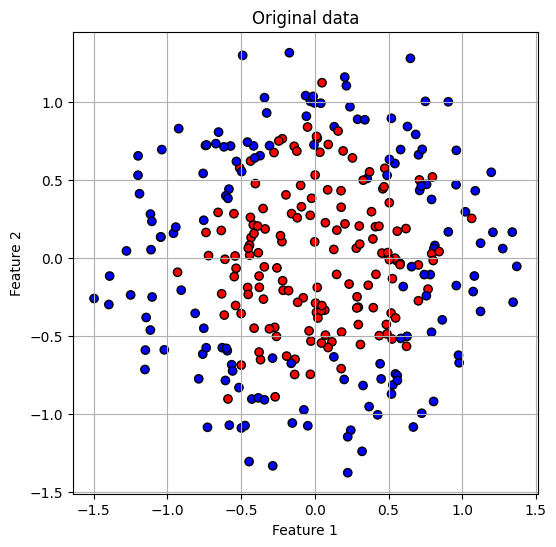

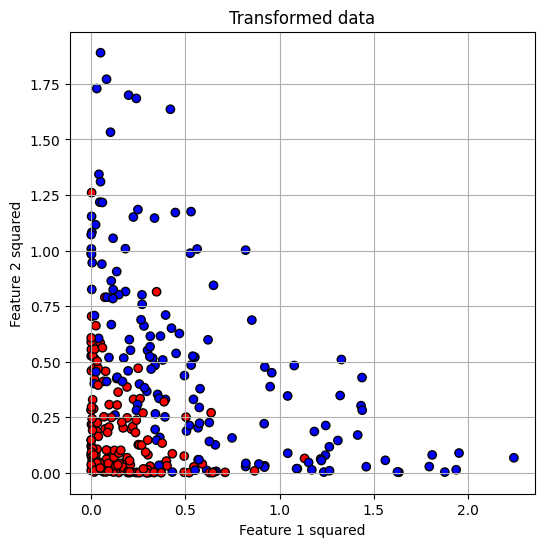

In [39]:

# 2. Visualize original data
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title('Original data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

# 3. Function to transform data
def transform_data(X):
    # For example, map (x, y) -> (x^2, y^2) to add nonlinearity
    X_transformed = np.column_stack((X[:, 0]**2, X[:, 1]**2))
    return X_transformed

# 4. Visualize transformed data
X_transformed = transform_data(X)
plt.figure(figsize=(6, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title('Transformed data')
plt.xlabel('Feature 1 squared')
plt.ylabel('Feature 2 squared')
plt.grid(True)
plt.show()


b) (10%) Fit a KNeighborsClassifier for different values ​​of "k" on the training data and calculate the accuracy for the training and test data. Create a plot for "k" vs "Accuracy" for training and test accuracy

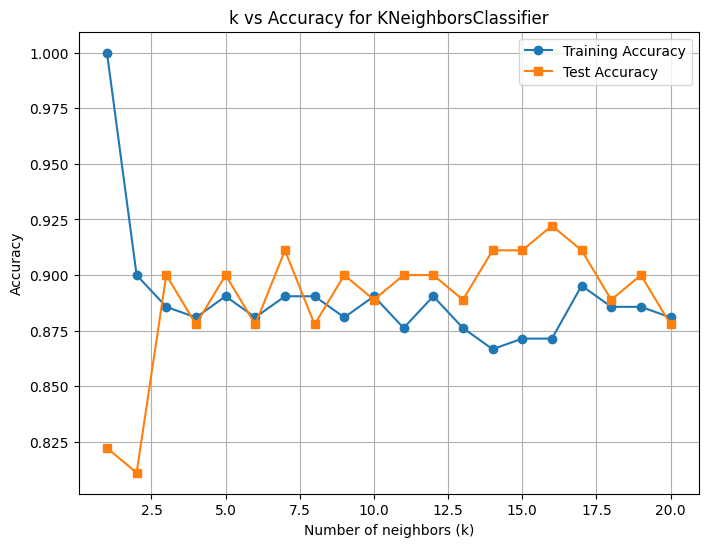

In [40]:

# Optional: transform the data (use the transform_data function from before)
def transform_data(X):
    return np.column_stack((X[:, 0]**2, X[:, 1]**2))

X_transformed = transform_data(X)

# Split into train and test sets (e.g. 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

# Prepare to store accuracies
k_values = list(range(1, 21))
train_accuracies = []
test_accuracies = []

# Train KNeighborsClassifier for each k and compute accuracy
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(k_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='s')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy for KNeighborsClassifier')
plt.legend()
plt.grid(True)
plt.show()


c) (30%) Split your training data into different training and validation sets and perform CrossValidation to find the best value for "k".

Best k found by cross-validation: 15


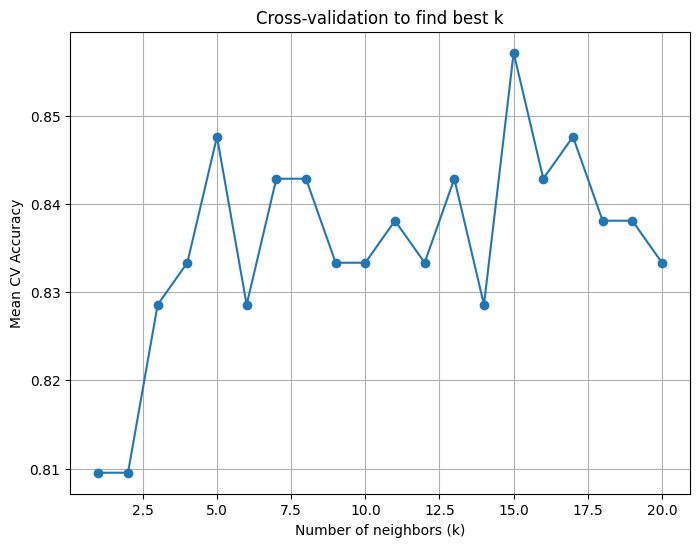

In [41]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

def transform_data(X):
    return np.column_stack((X[:, 0]**2, X[:, 1]**2))

X_transformed = transform_data(X)

# Split into train/test (30% test)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

# Cross-validation on training data to find best k
k_values = list(range(1, 21))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # 5-fold CV on training data, scoring by accuracy
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find best k
best_k = k_values[np.argmax(cv_scores)]
print(f"Best k found by cross-validation: {best_k}")

# Plot k vs CV accuracy
plt.figure(figsize=(8,6))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Mean CV Accuracy')
plt.title('Cross-validation to find best k')
plt.grid(True)
plt.show()


d) (5%) Plot "k" vs "CrossValidation Accuracy" with associated error bars. Does the value for “k” you determined in this way match the previously obtained best value for “k” on the test data?

Best k from cross-validation: 15
Best k from test accuracy: 16


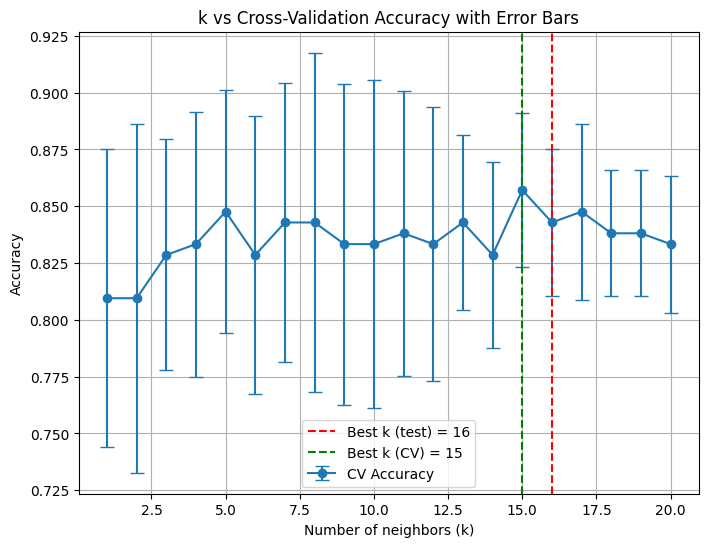

In [42]:

def transform_data(X):
    return np.column_stack((X[:, 0]**2, X[:, 1]**2))

X_transformed = transform_data(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

# Previously found best k on test set (from training/testing accuracy plot)
# (Assuming you saved it, otherwise compute it again)
k_values = list(range(1, 21))

# Calculate test accuracies again to find best k for test data
from sklearn.metrics import accuracy_score
test_accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
best_k_test = k_values[np.argmax(test_accuracies)]

# Perform cross-validation on training data and store mean and std
cv_means = []
cv_stds = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_means.append(scores.mean())
    cv_stds.append(scores.std())

best_k_cv = k_values[np.argmax(cv_means)]

print(f"Best k from cross-validation: {best_k_cv}")
print(f"Best k from test accuracy: {best_k_test}")

# Plot with error bars
plt.figure(figsize=(8, 6))
plt.errorbar(k_values, cv_means, yerr=cv_stds, fmt='-o', capsize=5, label='CV Accuracy')
plt.axvline(best_k_test, color='red', linestyle='--', label=f'Best k (test) = {best_k_test}')
plt.axvline(best_k_cv, color='green', linestyle='--', label=f'Best k (CV) = {best_k_cv}')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k vs Cross-Validation Accuracy with Error Bars')
plt.legend()
plt.grid(True)
plt.show()


---